In [1]:
#library loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # to show all columns
pd.set_option('display.max_rows', 100)

%matplotlib inline


In [2]:
# Data loading

file_path = "data/household_power_consumption.csv"

# This dataset uses ',' as a separator and '?' for missing values.
try:
    df = pd.read_csv(file_path, 
                     sep=',', 
                     na_values=['?'], 
                     low_memory=False) # low_memory=False can help with mixed types
    print("Dataset loaded successfully!")
    print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns.")
except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
    print("Please ensure the file path is correct and the file is in the 'data' directory within your project.")
    df = None 
except Exception as e:
    print(f"An error occurred during loading: {e}")
    df = None

Dataset loaded successfully!
Loaded 260640 rows and 10 columns.


In [3]:
if df is not None:
    # Display the first few rows
    print("First 5 rows of the dataset:")
    display(df.head()) 

    # Get a concise summary of the DataFrame
    print("\nDataFrame Info:")
    df.info()

    # Check for initial missing value counts
    print("\nMissing values per column:")
    print(df.isnull().sum())
else:
    print("DataFrame not loaded. Cannot perform inspection.")

First 5 rows of the dataset:


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0
3,3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0
4,4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    256869 non-null  float64
 4   Global_reactive_power  256869 non-null  float64
 5   Voltage                256869 non-null  float64
 6   Global_intensity       256869 non-null  float64
 7   Sub_metering_1         256869 non-null  float64
 8   Sub_metering_2         256869 non-null  float64
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 19.9+ MB

Missing values per column:
index                       0
Date                        0
Time                        0
Global_active_power      3771
Global_reactive_power    

In [4]:
if df is not None and 'index' in df.columns:
    # Check at the 'index' column before drop
    print("Unique values in 'index' column (first 10):", df['index'].unique()[:10])
    try:
        df = df.drop(columns=['index'])
        print("\n'index' column dropped.")
    except KeyError:
        print("\n'index' column not found or already dropped.")
    
    print("\nFirst 3 rows after potential drop:")
    display(df.head(3))

Unique values in 'index' column (first 10): [0 1 2 3 4 5 6 7 8 9]

'index' column dropped.

First 3 rows after potential drop:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0


In [5]:

if df is not None:
    try:
        # Combine Date and Time columns into a single string column
        df['datetime_str'] = df['Date'] + ' ' + df['Time']
        
        # Convert the new string column to datetime objects
        
        df['datetime'] = pd.to_datetime(df['datetime_str']) 
        
        # Set the new datetime column as the index
        df = df.set_index('datetime')
        
        # Drop the original Date, Time and the temporary datetime_str columns
        df = df.drop(columns=['Date', 'Time', 'datetime_str'])
        
        print("\nDatetime index created successfully.")
        print("\nDataFrame Info after creating datetime index:")
        df.info()
        print("\nFirst 3 rows with datetime index:")
        display(df.head(3))
        print("\nLast 3 rows with datetime index (to check later dates):")
        display(df.tail(3)) 
        
    except ValueError as ve:
        print(f"ValueError during datetime processing (even with inference): {ve}")
        
        if 'datetime_str' in df.columns:
            
            print("\nSample of 'datetime_str' that might still be causing issues:")
            
    except Exception as e:
        print(f"An general error occurred during datetime processing: {e}")


Datetime index created successfully.

DataFrame Info after creating datetime index:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260640 entries, 2007-01-01 00:00:00 to 2007-06-30 23:59:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    256869 non-null  float64
 1   Global_reactive_power  256869 non-null  float64
 2   Voltage                256869 non-null  float64
 3   Global_intensity       256869 non-null  float64
 4   Sub_metering_1         256869 non-null  float64
 5   Sub_metering_2         256869 non-null  float64
 6   Sub_metering_3         256869 non-null  float64
dtypes: float64(7)
memory usage: 15.9 MB

First 3 rows with datetime index:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0



Last 3 rows with datetime index (to check later dates):


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2007-06-30 23:57:00,2.882,0.280,239.05,12.0,0.0,0.0,18.0
2007-06-30 23:58:00,2.660,0.290,238.98,11.2,0.0,0.0,18.0
2007-06-30 23:59:00,2.548,0.354,239.25,10.6,0.0,1.0,17.0


In [6]:

if df is not None:
    print("\nMissing values before handling:")
    print(df.isnull().sum())
    
    # For time series data, forward fill (ffill) is a common strategy for missing sensor readings.
    
    # Calculate percentage of missing values for a key column
    
    if 'Global_active_power' in df.columns:
        missing_percentage = (df['Global_active_power'].isnull().sum() / len(df)) * 100
        print(f"\nPercentage of missing values in Global_active_power: {missing_percentage:.2f}%")

        if missing_percentage > 0:
            # Apply forward fill to all columns
            df_filled = df.ffill() 
            
            print("\nMissing values after forward fill (on a copy):")
            print(df_filled.isnull().sum()) 

            # If forward fill still leaves NaNs at the very beginning 
            # we might need to backfill or drop those few initial rows.
            if df_filled.isnull().any().any(): 
                print("\nSome NaNs remain after ffill (likely at the beginning). Applying bfill.")
                df_filled = df_filled.bfill() 
                print("\nMissing values after ffill then bfill (on a copy):")
                print(df_filled.isnull().sum())
            
            df = df_filled # Update 
            print("\nOriginal DataFrame 'df' updated with filled values.")
        else:
            print("\nNo missing values to fill in Global_active_power.")
    
    # Verify no missing values remain in the main df
    print("\nFinal check of missing values in 'df':")
    print(df.isnull().sum())
    print("\nDataFrame Info after handling missing values:")
    df.info() 


Missing values before handling:
Global_active_power      3771
Global_reactive_power    3771
Voltage                  3771
Global_intensity         3771
Sub_metering_1           3771
Sub_metering_2           3771
Sub_metering_3           3771
dtype: int64

Percentage of missing values in Global_active_power: 1.45%

Missing values after forward fill (on a copy):
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Original DataFrame 'df' updated with filled values.

Final check of missing values in 'df':
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

DataFrame Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260640 entries, 2007-01-01 00:00:00 to 

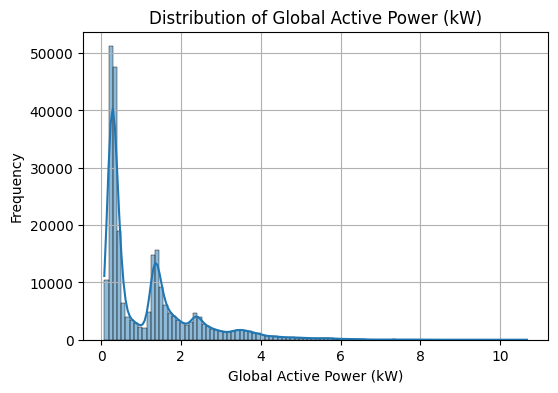

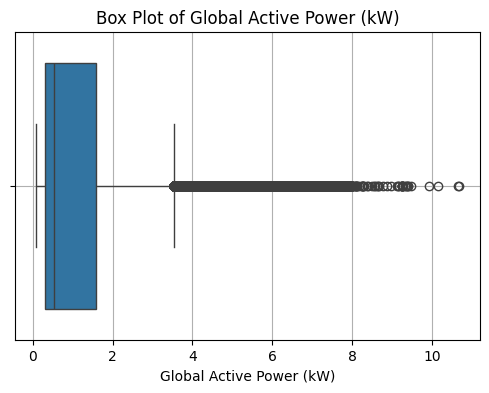


Descriptive statistics for Global Active Power:
count    260640.000000
mean          1.155304
std           1.175996
min           0.082000
25%           0.298000
50%           0.534000
75%           1.590000
max          10.670000
Name: Global_active_power, dtype: float64


In [11]:
if df is not None:
    plt.figure(figsize=(6, 4))
    sns.histplot(df['Global_active_power'], kde=True, bins=100)
    plt.title('Distribution of Global Active Power (kW)')
    plt.xlabel('Global Active Power (kW)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df['Global_active_power'])
    plt.title('Box Plot of Global Active Power (kW)')
    plt.xlabel('Global Active Power (kW)')
    plt.grid(True)
    plt.show()

    print("\nDescriptive statistics for Global Active Power:")
    print(df['Global_active_power'].describe())

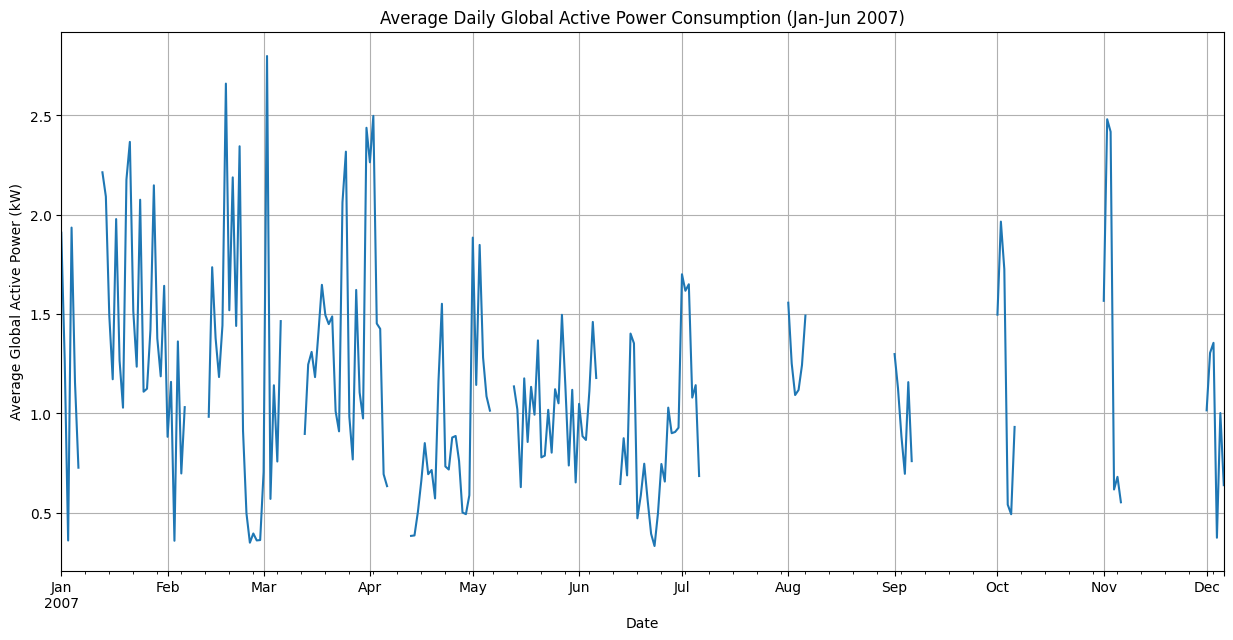

In [12]:
#Time Series Plot of Global Active Power (Daily Average)
if df is not None:
    # Resample to daily average power
    df_daily_avg_power = df['Global_active_power'].resample('D').mean() # 'D' for daily frequency

    plt.figure(figsize=(15, 7))
    df_daily_avg_power.plot()
    plt.title('Average Daily Global Active Power Consumption (Jan-Jun 2007)')
    plt.xlabel('Date')
    plt.ylabel('Average Global Active Power (kW)')
    plt.grid(True)
    plt.show()

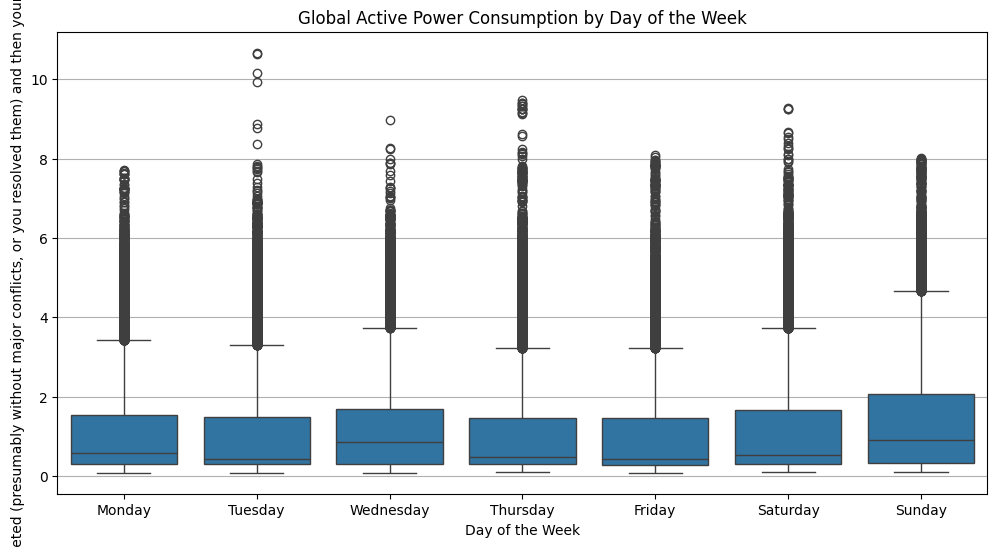

In [15]:
# Power Consumption by Day of the Week
if df is not None:
    # Create a 'day_of_week' column (Monday=0, Sunday=6)
    df_copy = df.copy() # Work on a copy for adding new columns for EDA
    df_copy['day_of_week_num'] = df_copy.index.dayofweek 
    df_copy['day_of_week_name'] = df_copy.index.day_name()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='day_of_week_name', y='Global_active_power', data=df_copy, 
                order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.title('Global Active Power Consumption by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Global! So, `git pull` completed (presumably without major conflicts, or you resolved them) and then your `git push` Active Power (kW)')
    plt.grid(axis='y')
    plt.show()




**Next Steps for Project: Continuing EDA & Moving Towards Modeling**


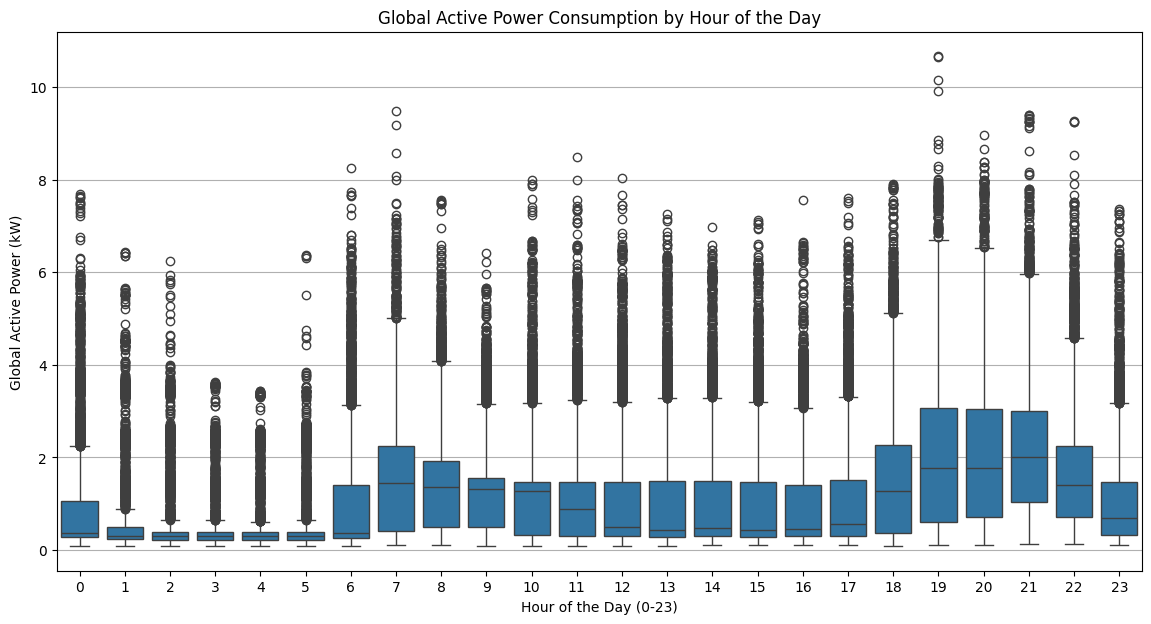

In [17]:
# Power Consumption by Hour of the Day
if df is not None:
    if 'df_copy' not in locals() or df_copy is None or df_copy.empty: # Ensure df_copy exists and is not empty from previous cell
         df_copy = df.copy()         
    df_copy['hour_of_day'] = df_copy.index.hour

    plt.figure(figsize=(14, 7))
    sns.boxplot(x='hour_of_day', y='Global_active_power', data=df_copy)
    plt.title('Global Active Power Consumption by Hour of the Day')
    plt.xlabel('Hour of the Day (0-23)')
    plt.ylabel('Global Active Power (kW)')
    plt.grid(axis='y')
    plt.show()



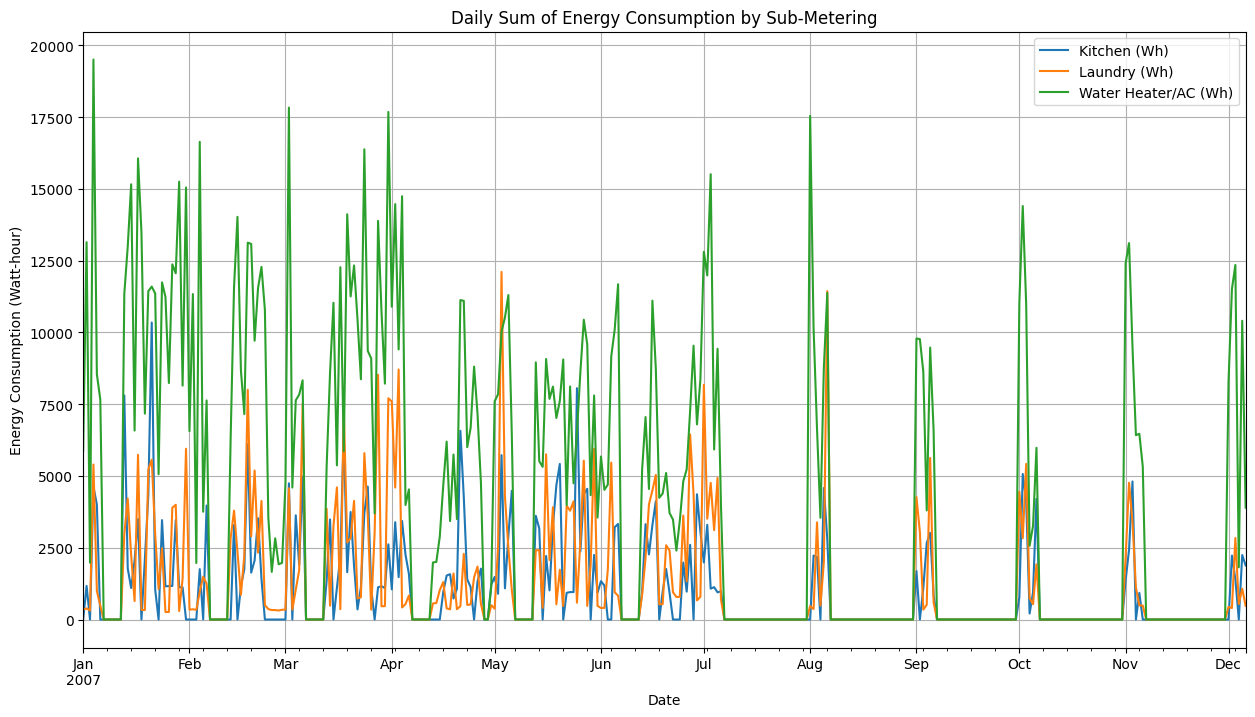

In [22]:
 # Sub-metering is in Watt-hours. 
if df is not None: 
    
    # For daily sums of Watt-hours:
    df_daily_sub_sum = df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].resample('D').sum()

    plt.figure(figsize=(15, 8))
    df_daily_sub_sum['Sub_metering_1'].plot(label='Kitchen (Wh)')
    df_daily_sub_sum['Sub_metering_2'].plot(label='Laundry (Wh)')
    df_daily_sub_sum['Sub_metering_3'].plot(label='Water Heater/AC (Wh)')
    
    plt.title('Daily Sum of Energy Consumption by Sub-Metering')
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption (Watt-hour)')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("DataFrame df is not loaded.")

Created 'Other_consumption' column.


,Global_active_energy_Wh_per_min,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_consumption
datetime,,,,,
2007-01-01 00:00:00,43.000000,0.0,0.0,0.0,43.000000
2007-01-01 00:01:00,42.533333,0.0,0.0,0.0,42.533333
2007-01-01 00:02:00,42.500000,0.0,0.0,0.0,42.500000
2007-01-01 00:03:00,42.500000,0.0,0.0,0.0,42.500000
2007-01-01 00:04:00,42.566667,0.0,0.0,0.0,42.566667


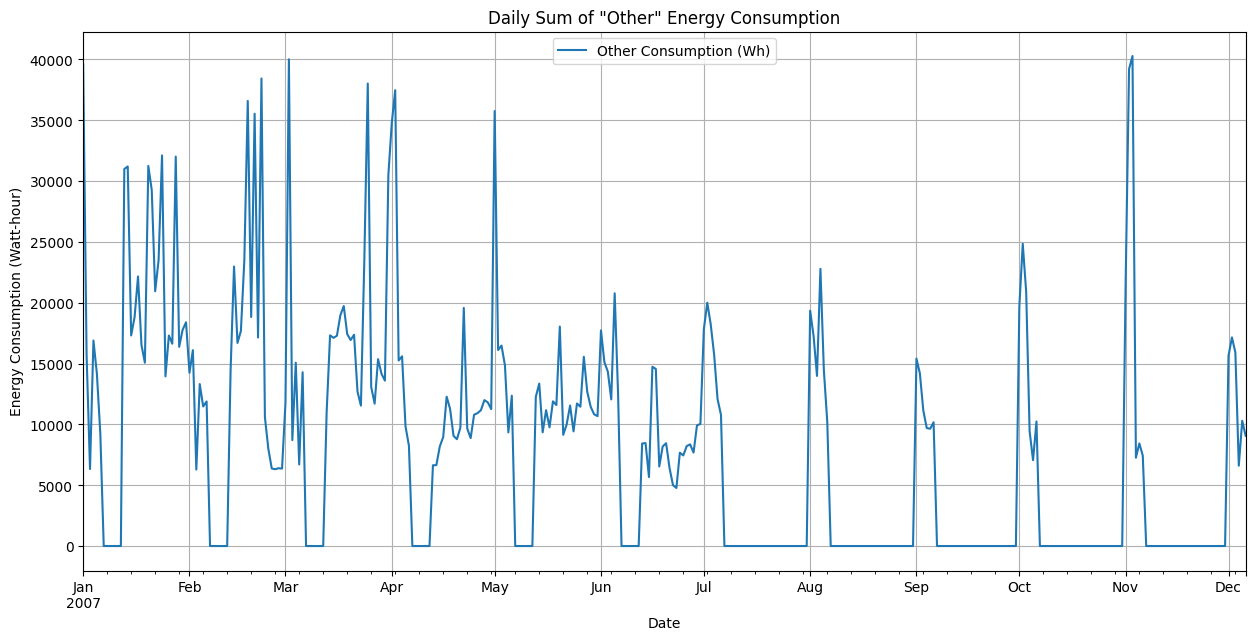

In [23]:
# Feature Engineering - Other Consumption
if df is not None:
    # Global_active_power is in kW. Sub_metering is in Watt-hour for that minute.
    # Convert Global_active_power (kW) to Watt-hour for that minute: kW * 1000 W/kW * (1/60) h/min
    df['Global_active_energy_Wh_per_min'] = df['Global_active_power'] * (1000 / 60)
    
    df['Other_consumption'] = df['Global_active_energy_Wh_per_min'] - \
                              df['Sub_metering_1'] - \
                              df['Sub_metering_2'] - \
                              df['Sub_metering_3']
    
    # Handle potential negative values (due to measurement discrepancies) by clipping at 0
    df['Other_consumption'] = df['Other_consumption'].clip(lower=0)
    
    print("Created 'Other_consumption' column.")
    display(df[['Global_active_energy_Wh_per_min', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'Other_consumption']].head())
    
    # Plot the new "Other_consumption" daily sum
    df_daily_other_sum = df['Other_consumption'].resample('D').sum()
    plt.figure(figsize=(15,7))
    df_daily_other_sum.plot(label='Other Consumption (Wh)')
    plt.title('Daily Sum of "Other" Energy Consumption')
    plt.xlabel('Date')
    plt.ylabel('Energy Consumption (Watt-hour)')
    plt.legend()
    plt.grid(True)
    plt.show()


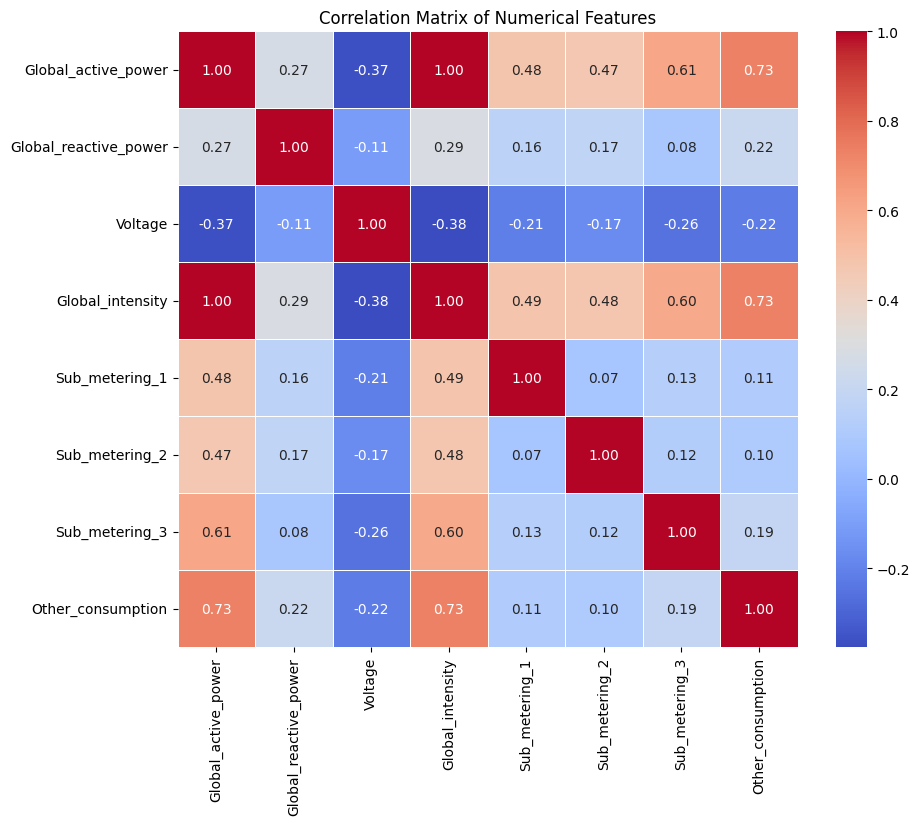

In [24]:
# Correlation Analysis
if df is not None:
    # Select only numerical columns for correlation matrix
    # to drop 'Global_active_energy_Wh_per_min' if it's too similar to Global_active_power
    numerical_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                      'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 
                      'Sub_metering_3', 'Other_consumption']
    
    # Ensure all selected columns exist
    existing_numerical_cols = [col for col in numerical_cols if col in df.columns]
    
    if existing_numerical_cols:
        correlation_matrix = df[existing_numerical_cols].corr()
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Matrix of Numerical Features')
        plt.show()
    else:
        print("No numerical columns found for correlation matrix (or columns missing).")

In [25]:
# Feature Engineering - More Time-Based Features
if df is not None:
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek # Monday=0, Sunday=6
    df['day_name'] = df.index.day_name()
    df['month'] = df.index.month
    df['day_of_year'] = df.index.dayofyear
    df['week_of_year'] = df.index.isocalendar().week.astype(int) # Needs .isocalendar().week for pandas >= 1.1
    df['quarter'] = df.index.quarter
    
    print("Added more time-based features.")
    display(df[['hour', 'day_of_week', 'month', 'day_of_year', 'week_of_year', 'quarter']].head())

Added more time-based features.


,hour,day_of_week,month,day_of_year,week_of_year,quarter
datetime,,,,,,
2007-01-01 00:00:00,0,0,1,1,1,1
2007-01-01 00:01:00,0,0,1,1,1,1
2007-01-01 00:02:00,0,0,1,1,1,1
2007-01-01 00:03:00,0,0,1,1,1,1
2007-01-01 00:04:00,0,0,1,1,1,1
